# Multiple Linear Regression

### It is a type of supervised machine learning algorithm that uses statistical method to model relation between dependant and independant variables. 

In [1]:
# Libraries required for linear regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read dataset
data = "C://Users//dever//Downloads//Housing (1).csv"
df = pd.read_csv(data)

### Preprocess the data

In [4]:
# Understand the data
df.head()


,rownames,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000,6360,2,1,1,yes,no,no,no,no,0,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   rownames  546 non-null    int64 
 1   price     546 non-null    int64 
 2   lotsize   546 non-null    int64 
 3   bedrooms  546 non-null    int64 
 4   bathrms   546 non-null    int64 
 5   stories   546 non-null    int64 
 6   driveway  546 non-null    object
 7   recroom   546 non-null    object
 8   fullbase  546 non-null    object
 9   gashw     546 non-null    object
 10  airco     546 non-null    object
 11  garagepl  546 non-null    int64 
 12  prefarea  546 non-null    object
dtypes: int64(7), object(6)
memory usage: 55.6+ KB


In [6]:
df.shape

(546, 13)

In [7]:
df.describe()

,rownames,price,lotsize,bedrooms,bathrms,stories,garagepl
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,273.500000,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.692308
std,157.760895,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.861307
min,1.000000,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,137.250000,49125.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,273.500000,62000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,409.750000,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,546.000000,190000.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
df.isnull()

,rownames,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,False,False,False,False,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False,False,False,False,False
544,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.columns

Index(['rownames', 'price', 'lotsize', 'bedrooms', 'bathrms', 'stories',
       'driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'garagepl',
       'prefarea'],
      dtype='object')

In [10]:
X = df[["lotsize", "bedrooms", "stories"]]
y = df[["price"]]

### Split the data into train and testing

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Create regression model and train the model

In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(436, 3)
(436, 1)
(110, 3)
(110, 1)


In [15]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

### Predict and get the metrics

In [16]:
y_pred = lm.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error

In [22]:
mse = mean_squared_error(y_test, y_pred)
print("MSE value: ",mse)

MSE value:  327722044.5924132


In [19]:
from sklearn.metrics import r2_score
print("R2 score value: {:.4f}".format(r2_score(y_test,y_pred)))

R2 score value: 0.4509


In [20]:
print(f"training accuracy: {lm.score(X_train,y_train)}")
print(f"testing accuracy: {lm.score(X_test,y_test)}")
print(f"mean squared error:{mean_squared_error(y_test,y_pred)}")
from sklearn.metrics import mean_absolute_error
print(f"mean absolute error:{mean_absolute_error(y_test,y_pred)}")

training accuracy: 0.44993778105896265
testing accuracy: 0.45093414718423575
mean squared error:327722044.5924132
mean absolute error:13639.943455110242


### Plot the graph

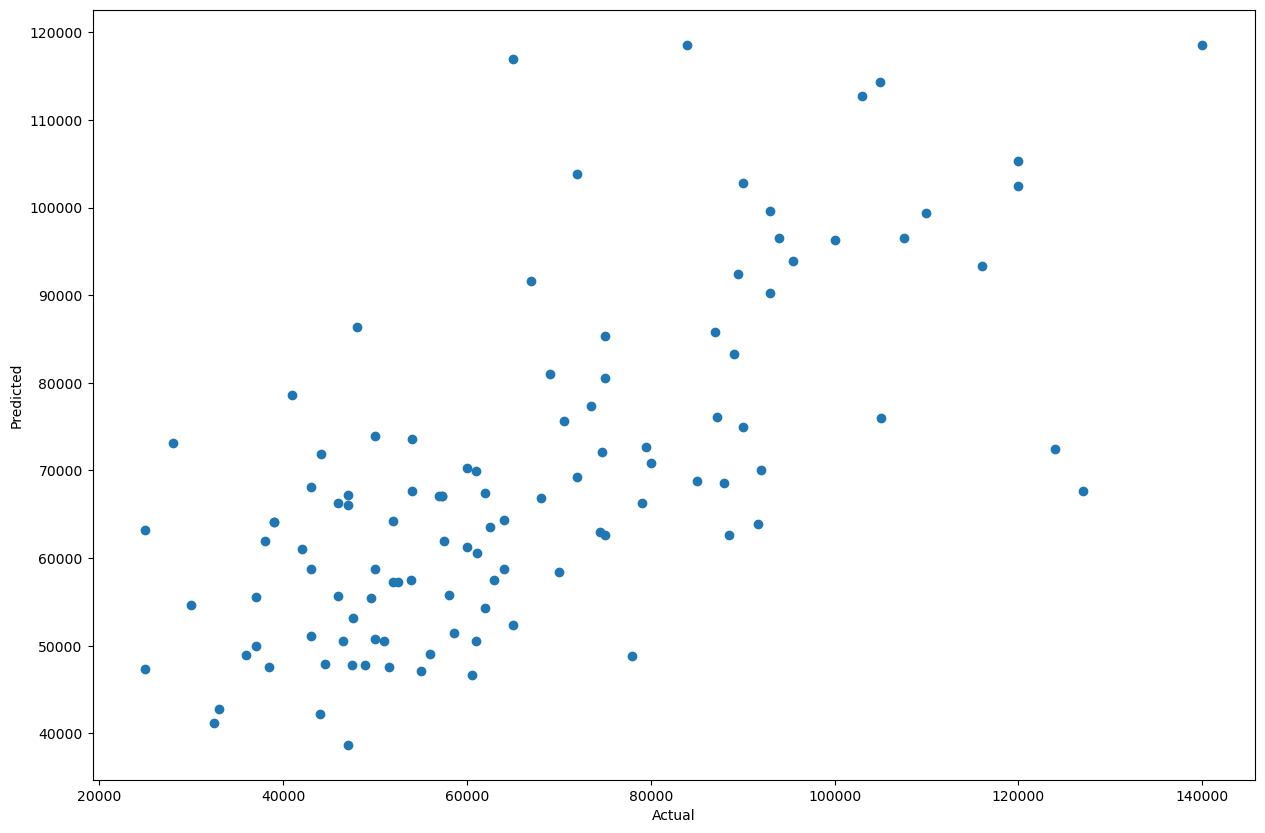

In [23]:
plt.figure(figsize = (15,10))
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()